# Sesión 6 de Stata

En la sesión 6 utilizamos la sección 5 para hacer gráficas.

## Setup

Como siempre, haremos un *do file* con su respectivo setup y nuestro (ahora obsoleto) *log*.

In [1]:
*=====================================================================

// PROYECTO: Quinta introductoria a STATA
// PROGRAMA: sesion_6.do
// TAREA: De long a wide
// CREADO POR: Manuel Toral
// FECHA DE CREACIÓN: 2022-07-29
// FECHA DE ACTUALIZACIÓN: 2022-08-01

*========================================================================
cd "C:\Users\User\Documents\MUCD_stata_intro\Sesion_6"
//log close sesion6
log using "logs_notebooks\log_sesion6.smcl", text replace name(sesion6)


C:\Users\User\Documents\MUCD_stata_intro\Sesion_6

file
    C:\Users\User\Documents\MUCD_stata_intro\Sesion_6\logs_notebooks\log_sesio
    > n6.smcl cannot be modified or erased; likely cause is read-only
    directory or file


r(608);
r(608);


# Datos

Vamos a usar los datos de incidencia delictiva del Secretariado, para no perder la costumbre.

In [2]:
// 1. Datos
import delimited "data\IDEFC_NM_jun22.csv", clear

(19 vars, 25,088 obs)


In [3]:
list in 1


     +---------------------------------------------------------------------+
  1. |  año | clave_~t |        entidad |             bienjurídicoafectado |
     | 2015 |        1 | Aguascalientes | La vida y la Integridad corporal |
     |---------------------------------------------------------------------|
     | tipoded~o |  subtipodedelito |         modalidad | enero | febrero  |
     | Homicidio | Homicidio doloso | Con arma de fuego |     3 |       0  |
     |------------------------------+---------------------------+----------|
     | marzo | abril | mayo | junio | julio | agosto | septie~e | octubre  |
     |     2 |     1 |    1 |     1 |     2 |      1 |        2 |       2  |
     |---------------------------------------------------------------------|
     |             noviem~e             |             diciem~e             |
     |                    2             |                    1             |
     +---------------------------------------------------------------------

In [4]:
// 2. Transformaciones y limpieza

//tab modalidad
//tab subtipodedelito

// 2.1 Conserva sólo el subtipo de delito y modalidad que definen "Homicidio doloso con arema de fuego"

tab modalidad if subtipodedelito == "Robo a casa habitación"

keep if subtipodedelito == "Robo a casa habitación" 
//& modalidad == "Con violencia"






                              Modalidad |      Freq.     Percent        Cum.
----------------------------------------+-----------------------------------
                          Con violencia |        256       50.00       50.00
                          Sin violencia |        256       50.00      100.00
----------------------------------------+-----------------------------------
                                  Total |        512      100.00

(24,576 observations deleted)


In [5]:
collapse (sum) enero-diciembre, by(año)
d




Contains data
  obs:             8                          
 vars:            13                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
año             int     %8.0g                 Año
enero           double  %8.0g                 (sum) enero
febrero         double  %8.0g                 (sum) febrero
marzo           double  %8.0g                 (sum) marzo
abril           double  %8.0g                 (sum) abril
mayo            double  %8.0g                 (sum) mayo
junio           double  %8.0g                 (sum) junio
julio           double  %8.0g                 (sum) julio
agosto          double  %8.0g                 (sum) agosto
septiembre      double  %8.0g                 (sum) septiembre
octubre         double  %8.0g                 

In [6]:
// 3. Convertir de wide a long

rename (enero-diciembre) (robocasahab(#)) ,addnumber

gen id = _n

reshape long robocasahab, i(id) j(mes)

d

//reshape wide homicidios, i(id) j(mes)

//d





(note: j = 1 2 3 4 5 6 7 8 9 10 11 12)


-----------------------------------------------------------------------------
Number of obs.                        8   ->      96
Number of variables                  14   ->       4
j variable (12 values)                    ->   mes
xij variables:
robocasahab1 robocasahab2 ... robocasahab12->  robocasahab
-----------------------------------------------------------------------------


Contains data
  obs:            96                          
 vars:             4                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              float   %9.0g                 
mes             byte    %9.0g                 
año             int     %8.0g                 Año
robocasahab     double  %8.0g                 
----

In [7]:
gen dia = 1

In [8]:
%browse

,id,mes,año,robocasahab,dia
1,1,1,2015,7850,1
2,1,2,2015,7215,1
3,1,3,2015,7589,1
4,1,4,2015,7561,1
5,1,5,2015,7509,1
6,1,6,2015,7630,1
7,1,7,2015,7845,1
8,1,8,2015,7853,1
9,1,9,2015,7762,1
10,1,10,2015,7394,1


In [9]:
gen edate = mdy(mes, dia, año)

format edate %dM-Y

format edate %dm-y // Mejor formato

In [10]:
// 5. Filtrar los datos necesarios

drop if robocasahab == 0

(6 observations deleted)



21994


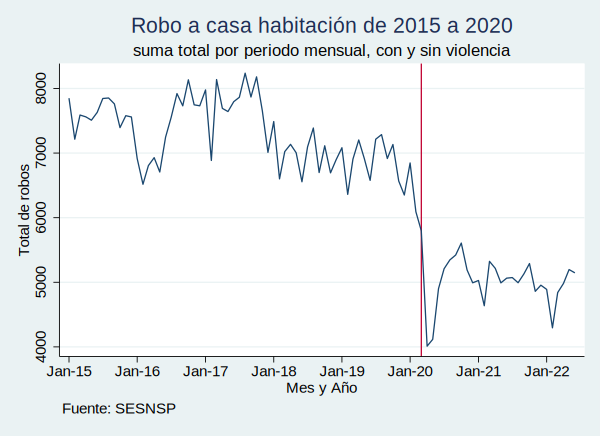

In [11]:
di td(20mar2020)
twoway line robocasahab edate, xline(21975) title(Robo a casa habitación de 2015 a 2020) ///
subtitle("suma total por periodo mensual, con y sin violencia") ytitle(Total de robos) ///
xtitle(Mes y Año) caption(Fuente: SESNSP)

In [3]:
log close sesion6

log sesion6 not found


r(111);
